# Abdullah Basher Sharaf (2139533)
# Big data CourseWork

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\programs\python37-cs\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2
Note: you may need to restart the kernel to use updated packages.


# Convolutional Neural NetWork

#  importing the necessary libraries for building and visualizing a convolutional neural network (CNN) using Keras

In [2]:
# importing the necessary libraries for building and visualizing a convolutional neural network (CNN) using Keras
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from tensorflow import keras
from keras import optimizers
import numpy as np
import os
import keras
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# split between train and test sets

In [3]:
# how many number of class  dataset
num_classes = 10 
#  batch size of keras.
batch_size = 128   
# epochs times
epochs = 12
# data_augmentation value
data_augmentation = False

#  train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape) 
print()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)

50000 train samples
10000 test samples


# Normalize the data

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# hot encoding.

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'SAME', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding = 'SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

# compile model

In [7]:
# compile model
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

# history of trainning process.( fit real-time data augmentation)


In [8]:
# history of trainning process
history = None  
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Use of real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False, 
        # set each sample mean to 0
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  # divide each input by its std
        # apply ZCA whitening
        zca_whitening=False, 
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=0,  
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,  
        # set range for random zoom
        zoom_range=0., 
        # set range for random channel shifts
        channel_shift_range=0., 
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    
# Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/12
391/391 [==============================] - 41s 105ms/step - loss: 1.5975 - accuracy: 0.4129 - val_loss: 1.2694 - val_accuracy: 0.5464
Epoch 2/12
391/391 [==============================] - 42s 107ms/step - loss: 1.2229 - accuracy: 0.5618 - val_loss: 1.0678 - val_accuracy: 0.6228
Epoch 3/12
391/391 [==============================] - 43s 109ms/step - loss: 1.0365 - accuracy: 0.6334 - val_loss: 0.8971 - val_accuracy: 0.6839
Epoch 4/12
391/391 [==============================] - 43s 110ms/step - loss: 0.9205 - accuracy: 0.6767 - val_loss: 0.8209 - val_accuracy: 0.7136
Epoch 5/12
391/391 [==============================] - 41s 106ms/step - loss: 0.8364 - accuracy: 0.7064 - val_loss: 0.7624 - val_accuracy: 0.7352
Epoch 6/12
391/391 [==============================] - 41s 105ms/step - loss: 0.7778 - accuracy: 0.7267 - val_loss: 0.7157 - val_accuracy: 0.7526
Epoch 7/12
391/391 [==============================] - 41s 105ms/step - loss: 0.7306 - accuracy: 0.742

# plotmodelhistory function to draw model Accuracy and Loss 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


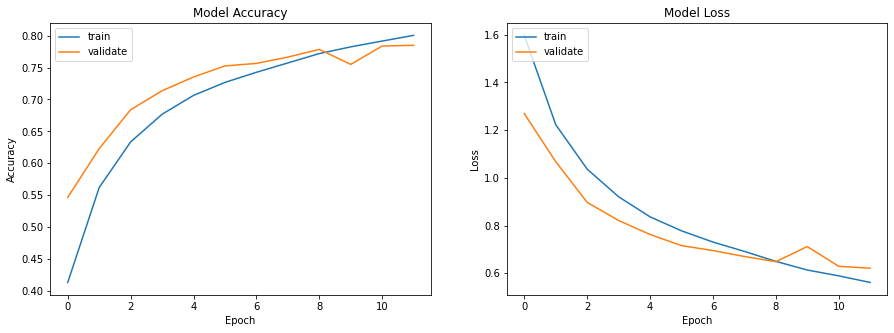

In [9]:
def plotmodelhistory(history):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validate'], loc = 'upper left')
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validate'], loc = 'upper left')
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)

# Test accuracy and Loss 

In [10]:
scores = model.evaluate(x_test, y_test, verbose = 1)
print('The Test loss is about  : '     , scores[0])
print('The Test accuracy is about  : ' , scores[1])
 
pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6209 - accuracy: 0.7849
The Test loss is about  :  0.6209139823913574
The Test accuracy is about  :  0.7849000096321106


# heatmap function 

In [11]:
def heatmap(data, row_labels, col_labels, ax = None, cbar_kw = {},cmap='plasma', cbarlabel = '', **kwargs):
    
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax= ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation = -90, va = 'bottom')
    ax.tick_params(top = True, bottom = False, labeltop = True, labelbottom = False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Predicted ')
    ax.set_ylabel('Fact ')
    
    return im, cbar

def annotate_heatmap(im, data = None, fmt = 'd', threshold = None):
    
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment = 'center',
                               color = 'red' if data[i, j] > thresh else 'yellow')
            
            texts.append(text)
            
    return texts

# use heat map to draw it

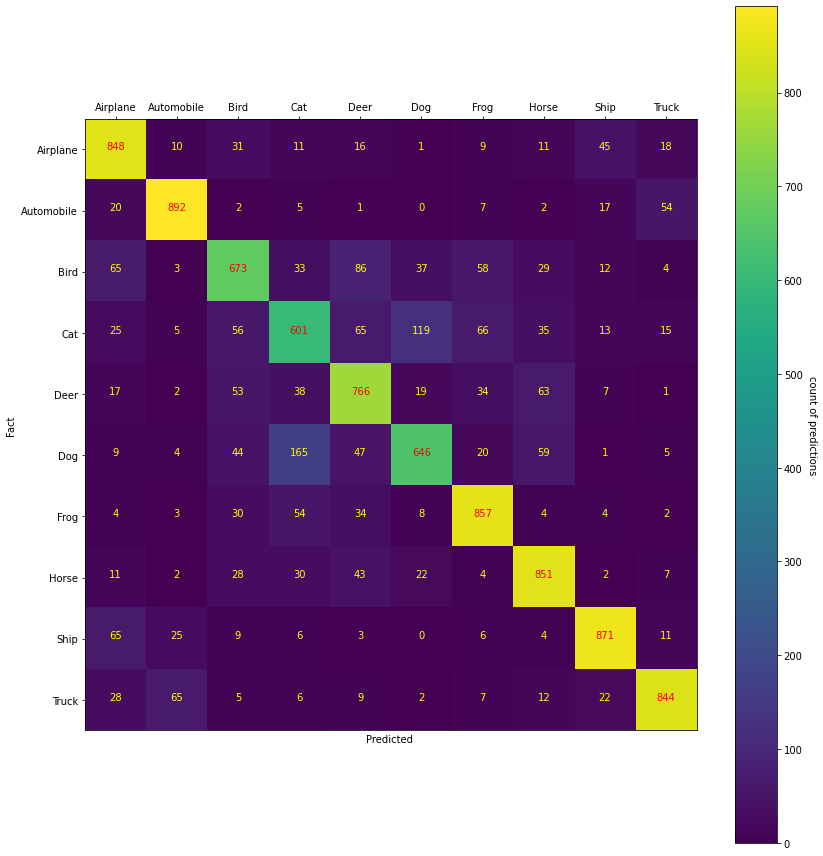

In [12]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

y_pred_classes = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

cm = confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2,

fig, ax = plt.subplots(figsize = (12, 12))
im, cbar = heatmap(cm, labels, labels, ax = ax,
                  cmap = plt.cm.Blues, cbarlabel = 'count of predictions')

texts = annotate_heatmap(im, data = cm, threshold = thresh)

fig.tight_layout()
plt.show()

In [13]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.88      0.89      0.89      1000
           2       0.72      0.67      0.70      1000
           3       0.63      0.60      0.62      1000
           4       0.72      0.77      0.74      1000
           5       0.76      0.65      0.70      1000
           6       0.80      0.86      0.83      1000
           7       0.80      0.85      0.82      1000
           8       0.88      0.87      0.87      1000
           9       0.88      0.84      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



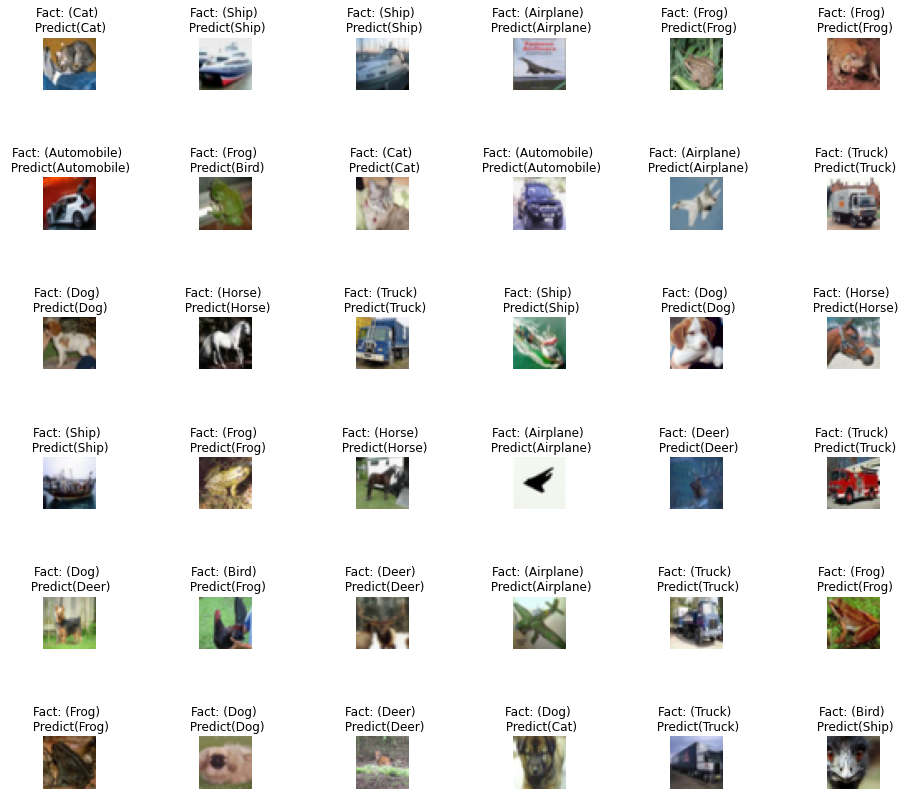

In [14]:
# number of image to show row anf colomn
R = 6
C = 6

fig, axes = plt.subplots(R, C, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Fact: (%s) \n Predict(%s)' % (labels[y_true[i]], labels[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 2)

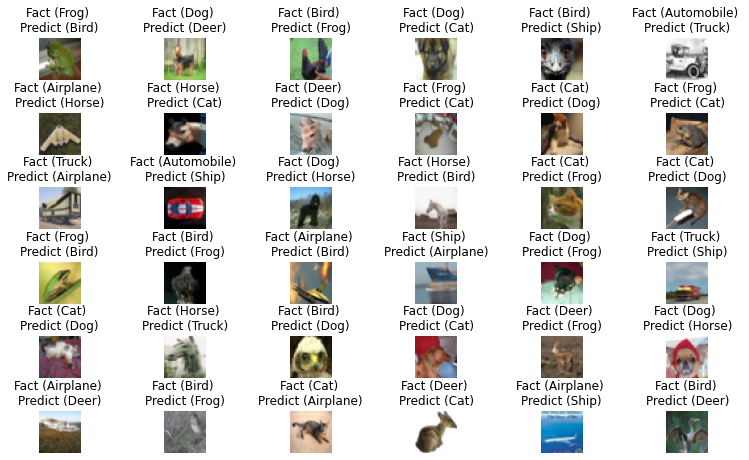

In [15]:
R = 6
C = 6
fig, axes = plt.subplots(R, C, figsize = (12, 8))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title('Fact (%s) \nPredict (%s)' % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 2)

# display_errors function

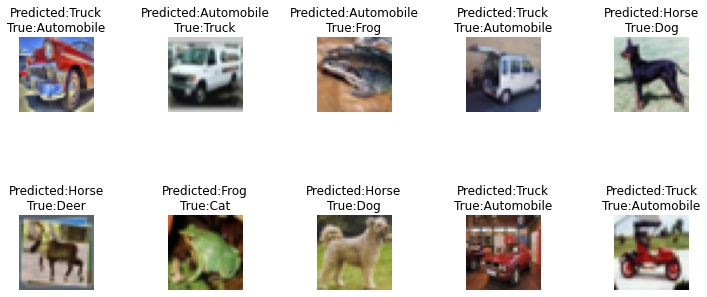

In [16]:
# display_errors function
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (12, 6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((32, 32, 3)))
            ax[row, col].set_title('Predicted:{}\nTrue:{}'.
                                  format(labels[pred_errors[error]], labels[obs_errors[error]]))
            n += 1
            ax[row, col].axis('off')
            plt.subplots_adjust(wspace = 1)
        
y_pred_errors_prob = np.max(y_pred_errors, axis = 1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-10:]

display_errors(most_important_errors, x_test_errors, y_pred_classes_errors, y_true_errors)

# test function the CNN

In [17]:
def show_test(number):
    fig = plt.figure(figsize = (3, 3))
    test_image = np.expand_dims(x_test[number], axis = 0)
    test_prob = model.predict(test_image, verbose = 0)
    test_result = test_prob.argmax(axis = -1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title('Predicted : {} \nTrue Label : {}'.format(labels[dict_key],
                                                       labels[y_true[number]]))

# please test here 

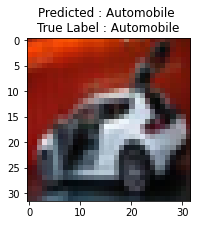

In [18]:
show_test(6)

# second method Support vector machines


In [19]:
pip install tqdm 

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install sklearnex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearnex (from versions: none)
ERROR: No matching distribution found for sklearnex


In [21]:
pip install scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


# packagies and libraries important

In [22]:
import cv2
import numpy as np
from tqdm import tqdm
from statistics import mean
from joblib import dump, load
from tensorflow import keras
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# load data and split to tarin and test sets

In [23]:
patch_sklearn()

# Load a subset of the CIFAR-10 dataset
train_subset_size = 5000
test_subset_size = 1000

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, y_train = x_train[:train_subset_size], y_train[:train_subset_size]
x_test, y_test = x_test[:test_subset_size], y_test[:test_subset_size]

assert x_train.shape == (train_subset_size, 32, 32, 3)
assert x_test.shape == (test_subset_size, 32, 32, 3)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
assert y_train.shape == (train_subset_size,)
assert y_test.shape == (test_subset_size,)



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# preprocess function

In [24]:
def preprocess(xs):
    hog_imgs = []
    for x in tqdm(xs):
        gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) / 255
        fd = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                 cells_per_block=(2, 2))
        hog_imgs.append(fd)
    return np.array(hog_imgs)

In [25]:
# Process data in smaller batches
batch_size = 1000
x_train_hog = np.concatenate([preprocess(x_train[i:i+batch_size]) for i in range(0, len(x_train), batch_size)])
x_test_hog = np.concatenate([preprocess(x_test[i:i+batch_size]) for i in range(0, len(x_test), batch_size)])



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4762.02it/s]


# Train the SVM model

In [26]:
# Train the SVM model
pipe = Pipeline([('standardscaler', StandardScaler()), ('pca', PCA(0.8)), ('rbfsvc', SVC(kernel='rbf', C=10, cache_size=10000))])
pipe.fit(x_train_hog, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.8)),
                ('rbfsvc', SVC(C=10, cache_size=10000))])

# Accuracy

In [27]:
# Evaluate the model on the test set
accuracy = pipe.score(x_test_hog, y_test)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 53.80%


# Confusion Matrix

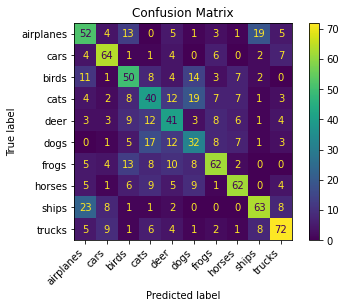

In [28]:
# Confusion Matrix
y_pred = pipe.predict(x_test_hog)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [29]:
# Classification Report
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

   airplanes       0.46      0.50      0.48       103
        cars       0.66      0.72      0.69        89
       birds       0.47      0.50      0.48       100
        cats       0.39      0.39      0.39       103
        deer       0.41      0.46      0.43        90
        dogs       0.37      0.37      0.37        86
       frogs       0.62      0.55      0.58       112
      horses       0.67      0.61      0.64       102
       ships       0.65      0.59      0.62       106
      trucks       0.68      0.66      0.67       109

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



# Display 20 Classified Images with Class Names

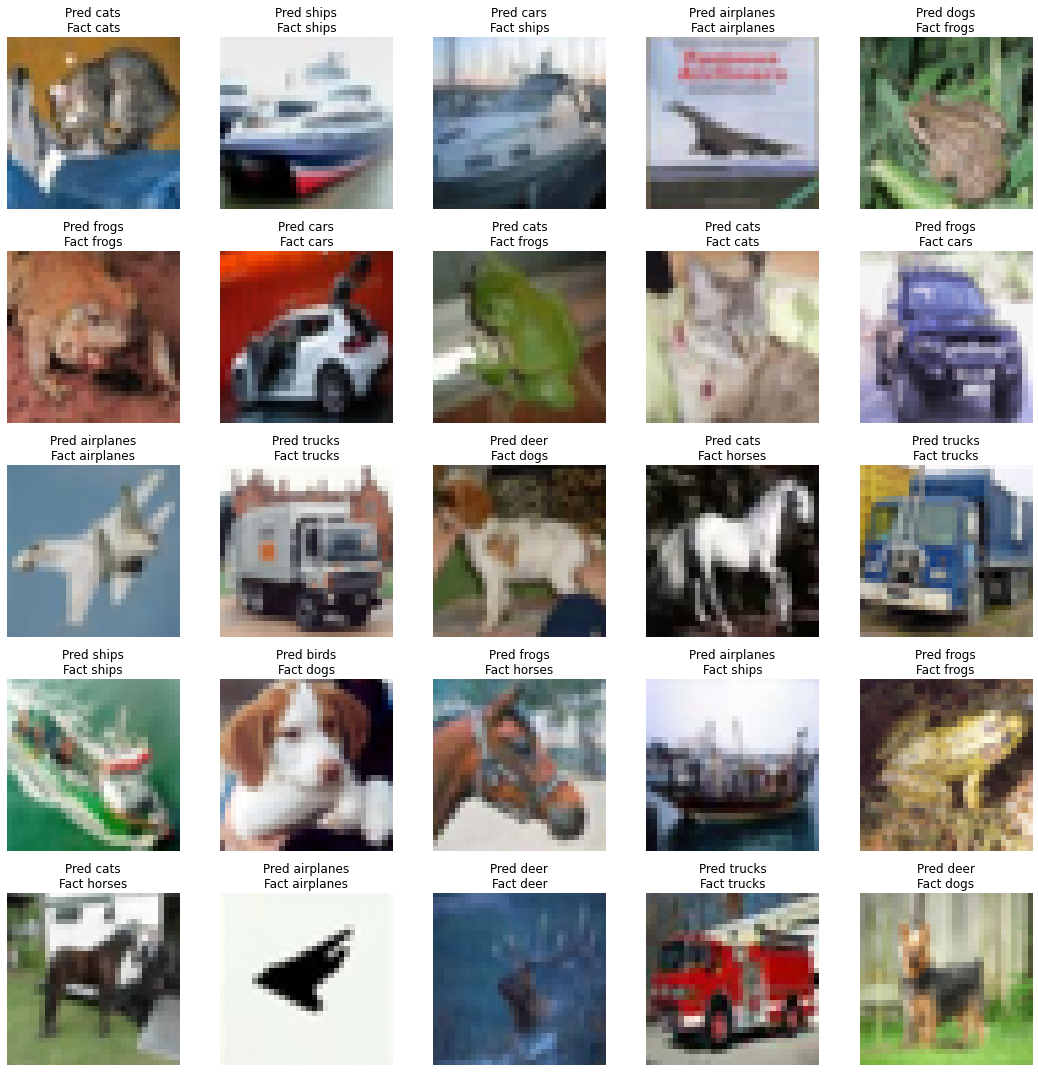

In [30]:
# Display 20 Classified Images with Class Names
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(32, 32, 3))
    true_class = class_names[y_test[i]]
    pred_class = class_names[y_pred[i]]
    ax.set_title(f'Pred {pred_class}\nFact {true_class}')
    ax.axis('off')
plt.tight_layout()
plt.show()